In [100]:
import pandas as pd
import sqlite3
import seaborn as sns

In [101]:
orders = pd.read_csv(r'C:\Users\ashwi\OneDrive\Desktop\food_delivery\orders.csv')
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [102]:
users = pd.read_json(r'C:\Users\ashwi\OneDrive\Desktop\food_delivery\users.json')
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [142]:
conn = sqlite3.connect("restaurants1.db")


In [143]:

with open(r'C:\Users\ashwi\OneDrive\Desktop\food_delivery\restaurants.sql', "r") as file:
    sql_script1 = file.read()

conn.executescript(sql_script1)

In [105]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [106]:
orders_users = orders.merge(
    users,
    on="user_id",
    how="left"
)

In [107]:
final_df = orders_users.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)


In [108]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [109]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [110]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


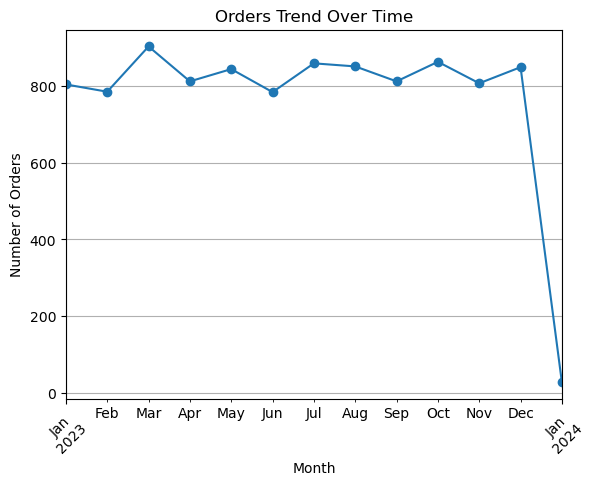

In [144]:
# Orders per month
orders_over_time = final_df.groupby(final_df['order_date'].dt.to_period('M'))['order_id'].count()

# Plot
orders_over_time.plot(kind='line', marker='o')
plt.title("Orders Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


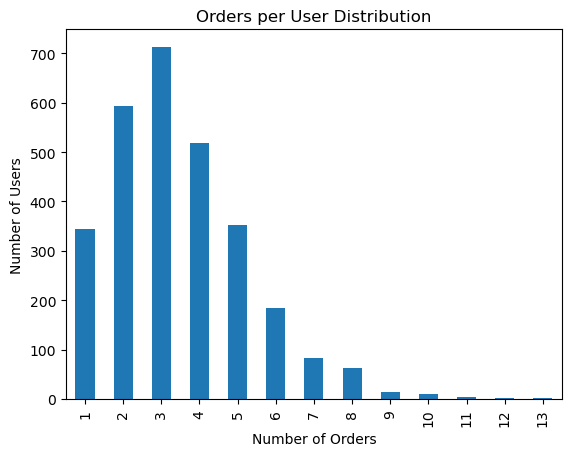

In [112]:
# USER BEHAVIOR PATTERNS –
orders_per_user = final_df.groupby('user_id')['order_id'].count()
orders_per_user.describe()
orders_per_user.value_counts().sort_index().plot(kind='bar')
plt.title("Orders per User Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.show()

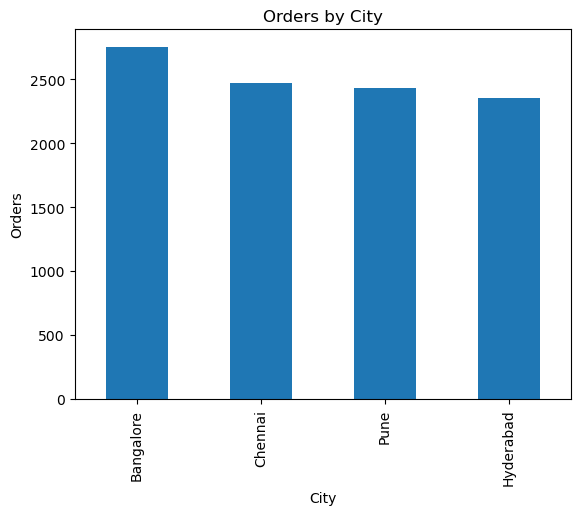

In [113]:
#CITY-WISE & 🍽️ CUISINE-WISE PERFORMANCE
#City-wise Performance
city_orders = final_df['city'].value_counts()

city_orders.plot(kind='bar')
plt.title("Orders by City")
plt.xlabel("City")
plt.ylabel("Orders")
plt.show()

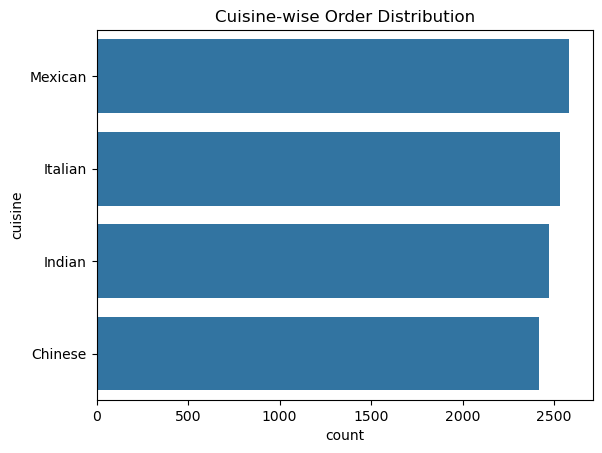

In [114]:
#Cuisine-wise Performance
sns.countplot(
    data=final_df,
    y='cuisine',
    order=final_df['cuisine'].value_counts().index
)
plt.title("Cuisine-wise Order Distribution")
plt.show()

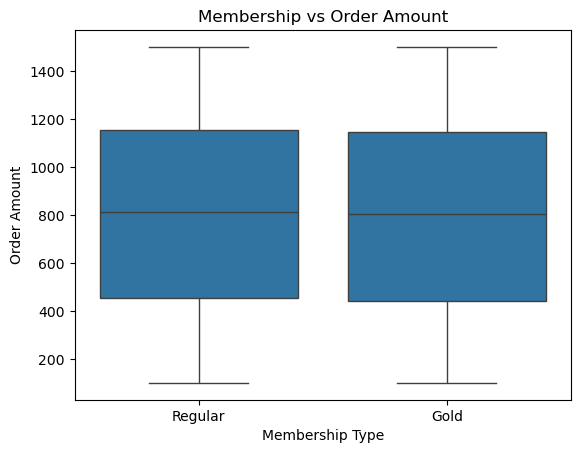

In [115]:
#Membership Impact on Revenue
sns.boxplot(
    data=final_df,
    x='membership',
    y='total_amount'
)

plt.title("Membership vs Order Amount")
plt.xlabel("Membership Type")
plt.ylabel("Order Amount")
plt.show()

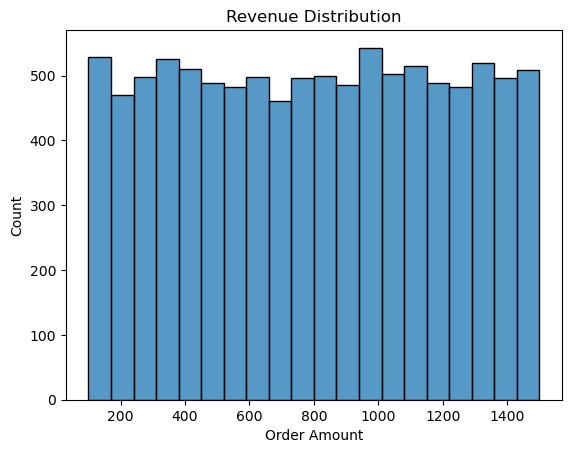

In [116]:
#Revenue Distribution
sns.histplot(final_df['total_amount'], bins=20)
plt.title("Revenue Distribution")
plt.xlabel("Order Amount")
plt.show()